In [7]:
import pandas as pd
import datetime as dt
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [8]:
df = pd.read_csv(r"C:\\Users\\yash0\OneDrive\Desktop\PR\Final Project\Data\cowin_vaccine_data_statewise.csv")
df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0


In [9]:
df = df.set_index(['State'])
df = df.drop(['India'], axis = 0)
df = df.reset_index()

In [10]:
df.State.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [11]:
doses_by_state = df.groupby(by = 'State', as_index = False).sum()
doses_by_state = doses_by_state.set_index('State')
doses_by_state['Covaxin (Doses Administered)'] = doses_by_state['Covaxin (Doses Administered)']/doses_by_state['Covaxin (Doses Administered)'].max()
doses_by_state['CoviShield (Doses Administered)'] = doses_by_state['CoviShield (Doses Administered)']/doses_by_state['CoviShield (Doses Administered)'].max()
doses_by_state

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
State,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,3.967746e+07,1234591.0,5651.0,2.971288e+07,9.964583e+06,1.626504e+07,1.418247e+07,4061.0,0.000000e+00,0.006103,...,615.0,1.308863e+07,1.159068e+07,5.772271e+06,1223324.0,4376537.0,2243271.0,4387523.0,3713987.0,615.0
Andhra Pradesh,3.203438e+09,151509162.0,443095.0,2.370023e+09,8.334154e+08,1.139487e+09,1.340206e+09,412570.0,6.014033e-01,0.413464,...,80518.0,8.190528e+08,1.073946e+09,5.871056e+08,101023557.0,254203320.0,187877645.0,282404176.0,282110452.0,76485.0
Arunachal Pradesh,1.119049e+08,4150155.0,28370.0,8.611796e+07,2.578698e+07,4.698376e+07,3.814915e+07,22263.0,2.143111e-06,0.017206,...,52124.0,5.088241e+07,2.475030e+07,9.522459e+06,7460518.0,8984788.0,3566261.0,11753535.0,9320135.0,7887.0
Assam,1.660918e+09,90202292.0,296509.0,1.348803e+09,3.121150e+08,7.150506e+08,6.489112e+08,200200.0,2.593853e-01,0.221664,...,39663.0,7.477405e+08,4.214228e+08,1.949986e+08,61397631.0,107917402.0,61222783.0,130411866.0,109322106.0,35119.0
Bihar,3.809949e+09,288582339.0,544777.0,3.175415e+09,6.345339e+08,1.596195e+09,1.427893e+09,624162.0,4.489391e-01,0.527484,...,39129.0,1.578318e+09,7.907866e+08,6.556084e+08,145118819.0,225690190.0,264843188.0,349289470.0,311444792.0,113638.0
Chandigarh,1.148845e+08,3576560.0,13259.0,8.644638e+07,2.843811e+07,5.144295e+07,3.878149e+07,13418.0,4.329107e-04,0.017623,...,24884.0,4.924592e+07,2.568954e+07,1.530240e+07,5287721.0,7913481.0,5823412.0,11348264.0,8381208.0,2024.0
Chhattisgarh,1.686257e+09,213030259.0,530648.0,1.330996e+09,3.552618e+08,5.883894e+08,5.833266e+08,137942.0,1.639951e-01,0.237892,...,111269.0,4.574078e+08,4.557165e+08,2.587297e+08,41727384.0,229332983.0,148175206.0,211645756.0,223617997.0,45488.0
Dadra and Nagar Haveli and Daman and Diu,7.866259e+07,5094186.0,14254.0,6.573604e+07,1.292655e+07,4.360010e+07,2.162589e+07,13489.0,4.126077e-06,0.012106,...,20499.0,4.735328e+07,1.347694e+07,4.409251e+06,5253085.0,4123599.0,1741440.0,7232714.0,4406202.0,1445.0
Delhi,1.533782e+09,36284446.0,182569.0,1.133806e+09,3.999756e+08,6.611939e+08,4.832278e+08,272656.0,4.518566e-01,0.176297,...,181373.0,6.126904e+08,3.378233e+08,1.941806e+08,90950668.0,119317570.0,82315060.0,179823973.0,125854689.0,58549.0


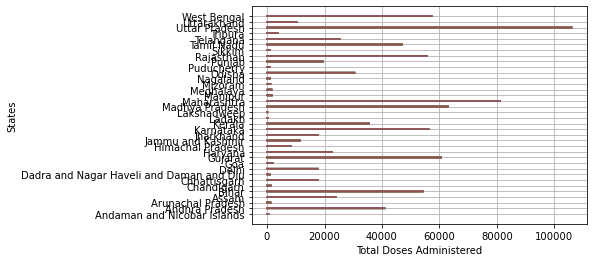

In [13]:
for state in df.State.unique():
    df['State'] == state
    plt.plot(df['Total Doses Administered']/1000, df['State'], label={state})
    plt.xlabel('Total Doses Administered')
    plt.ylabel('States')
    plt.grid(True)

In [14]:
literacy = pd.read_csv(r"C:\\Users\\yash0\OneDrive\Desktop\PR\Final Project\Data\Literacy.csv", index_col = 'State').drop(columns = '2001')
literacy = literacy.rename(columns = {'2011':'Literacy'})
literacy.head()

,Literacy
State,
A&N islands,86.27
Andhra Pradesh,67.66
Arunachal Pradesh,66.95
Assam,73.45
Bihar,61.82


In [64]:
ruling_parties = pd.read_csv(r"C:\\Users\\yash0\OneDrive\Desktop\PR\Final Project\Data\ruling_parties.csv")
ruling_parties = ruling_parties.drop(columns = ['S.No.', 'Gvt'])
ruling_parties['State / Union Territory'] = ruling_parties['State / Union Territory'].replace({'Jammu and Kashmir[2]':'Jammu and Kashmir'})
ruling_parties = ruling_parties.rename(columns = {'State / Union Territory' : 'State'})
ruling_parties = ruling_parties.set_index(['State'])
ruling_parties.head()

,Government
State,
Andhra Pradesh,Other
Arunachal Pradesh,Alliance
Assam,Alliance
Bihar,Alliance
Chhattisgarh,Other


In [65]:
state_with_literacy = pd.merge(doses_by_state, literacy, left_on='State', right_index=True, how='inner')
state_with_literacy = state_with_literacy.reset_index()

combined = pd.merge(state_with_literacy, ruling_parties, left_on='State', right_index=True, how='inner')
combined = combined.reset_index().drop(columns=['index', 'Sessions'])

combined['Total Doses Administered'] = (combined['Total Doses Administered']/combined['Total Doses Administered'].max())*100
combined
# combined = combined.set_index('State')

,State,Total Doses Administered,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),Literacy,Government
0,Sikkim,1.144783,8807.0,6.291400e+07,2.126096e+07,0.010634,0.011116,21426.0,3.814030e-06,0.012952,...,1.754867e+07,1.019105e+07,3557099.0,7119614.0,4728829.0,8693029.0,7440996.0,2727.0,82.20,Alliance
1,Nagaland,1.323497,24650.0,7.607637e+07,2.123924e+07,0.013154,0.012416,10987.0,4.399264e-06,0.014927,...,1.971159e+07,1.001602e+07,6399551.0,6638742.0,3655521.0,10590660.0,7032326.0,1509.0,80.11,Alliance
2,Puducherry,1.273349,12409.0,7.440860e+07,1.921970e+07,0.010907,0.014079,14095.0,1.660086e-05,0.014407,...,2.194713e+07,1.438784e+07,5471417.0,6712395.0,5125846.0,9113173.0,8645162.0,2317.0,86.55,Alliance
3,Arunachal Pradesh,1.521912,28370.0,8.611796e+07,2.578698e+07,0.014343,0.014563,22263.0,2.143111e-06,0.017206,...,2.475030e+07,9.522459e+06,7460518.0,8984788.0,3566261.0,11753535.0,9320135.0,7887.0,66.95,Alliance
4,Mizoram,1.453664,13831.0,8.228457e+07,2.460217e+07,0.012655,0.015605,13802.0,1.613221e-07,0.016437,...,2.330459e+07,1.451572e+07,4826364.0,8863596.0,5915492.0,10594236.0,9976825.0,1392.0,91.58,Other
5,Manipur,2.156065,24859.0,1.284931e+08,3.004063e+07,0.020891,0.022038,31537.0,8.749072e-07,0.024395,...,3.596613e+07,1.949696e+07,9858542.0,10185405.0,4939201.0,15398920.0,11250938.0,4407.0,79.85,Alliance
6,Goa,2.382787,18295.0,1.355503e+08,3.965409e+07,0.022362,0.024087,12724.0,3.469124e-03,0.026507,...,3.891502e+07,2.905117e+07,7514873.0,12191774.0,11403306.0,16425164.0,15687251.0,2369.0,87.40,Alliance
7,Tripura,5.900010,107820.0,3.183074e+08,1.155155e+08,0.047996,0.057174,44725.0,7.695397e-03,0.065716,...,1.131046e+08,5.980388e+07,13500603.0,48965819.0,27726999.0,48845211.0,44935091.0,12140.0,87.75,Alliance
8,Himachal Pradesh,10.370970,133354.0,5.914147e+08,1.711541e+08,0.089652,0.110557,122624.0,3.381204e-04,0.117229,...,1.906534e+08,1.406224e+08,17412755.0,68793840.0,59984689.0,74186948.0,76280181.0,24487.0,83.78,Same as Center
9,Jammu and Kashmir,12.688997,4623991.0,7.366948e+08,2.003344e+08,0.121668,0.112349,129672.0,4.207150e-02,0.138932,...,2.637886e+08,1.611796e+08,34068964.0,95141956.0,66307979.0,122692650.0,81029066.0,38065.0,68.74,Other


<AxesSubplot:title={'center':'State wise Literacy Index vs Total Covid doses administered'}, xlabel='State'>

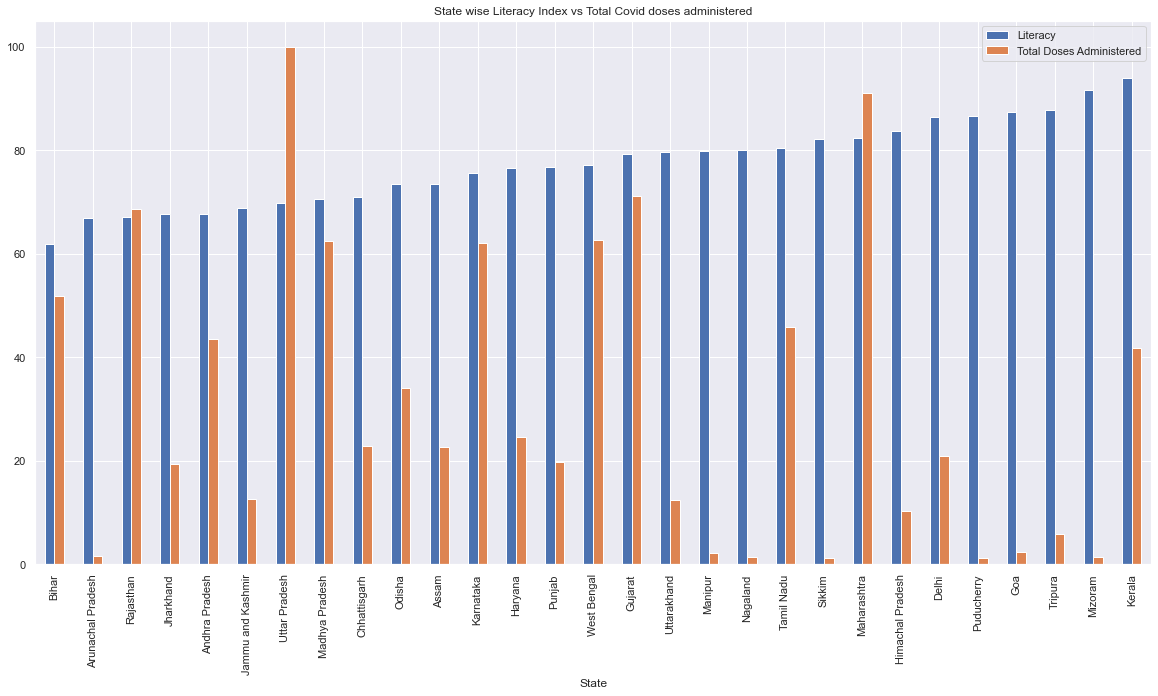

In [66]:
literacy_statewise = combined[['State', 'Literacy', 'Total Doses Administered']]
literacy_statewise = literacy_statewise.set_index(['State']).sort_values(by = 'Literacy')
literacy_statewise.plot(kind = 'bar', figsize = (20,10), title = 'State wise Literacy Index vs Total Covid doses administered')

In [67]:
doses_by_state['Male (Doses Administered)'] = doses_by_state['Male (Doses Administered)']/doses_by_state['Male (Doses Administered)'].max()
doses_by_state['Female (Doses Administered)'] = doses_by_state['Female (Doses Administered)']/doses_by_state['Female (Doses Administered)'].max()
doses_by_state = doses_by_state.sort_values(by = 'Female (Doses Administered)')
doses_by_state.head()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
State,,,,,,,,,,,,,,,,,,,,,
Lakshadweep,9543872.0,1283856.0,2757.0,7070067.0,2473805.0,0.001154,0.001207,460.0,8.831500e-08,0.001469,...,504.0,3426900.0,2258554.0,1255474.0,591777.0,925093.0,528243.0,1215081.0,909442.0,192.0
Ladakh,38600907.0,964479.0,6032.0,27788523.0,10812384.0,0.004536,0.004460,2826.0,1.071555e-06,0.005939,...,777.0,14459767.0,6752788.0,5329872.0,3240510.0,3040285.0,2759736.0,5156509.0,4308849.0,931.0
Andaman and Nicobar Islands,39677462.0,1234591.0,5651.0,29712879.0,9964583.0,0.004965,0.005414,4061.0,0.000000e+00,0.006103,...,615.0,13088629.0,11590679.0,5772271.0,1223324.0,4376537.0,2243271.0,4387523.0,3713987.0,615.0
Dadra and Nagar Haveli and Daman and Diu,78662594.0,5094186.0,14254.0,65736042.0,12926552.0,0.013310,0.008255,13489.0,4.126077e-06,0.012106,...,20499.0,47353280.0,13476940.0,4409251.0,5253085.0,4123599.0,1741440.0,7232714.0,4406202.0,1445.0
Sikkim,84174958.0,2215366.0,8807.0,62913996.0,21260962.0,0.010634,0.011116,21426.0,3.814030e-06,0.012952,...,47362.0,36235891.0,17548673.0,10191051.0,3557099.0,7119614.0,4728829.0,8693029.0,7440996.0,2727.0


<AxesSubplot:xlabel='State'>

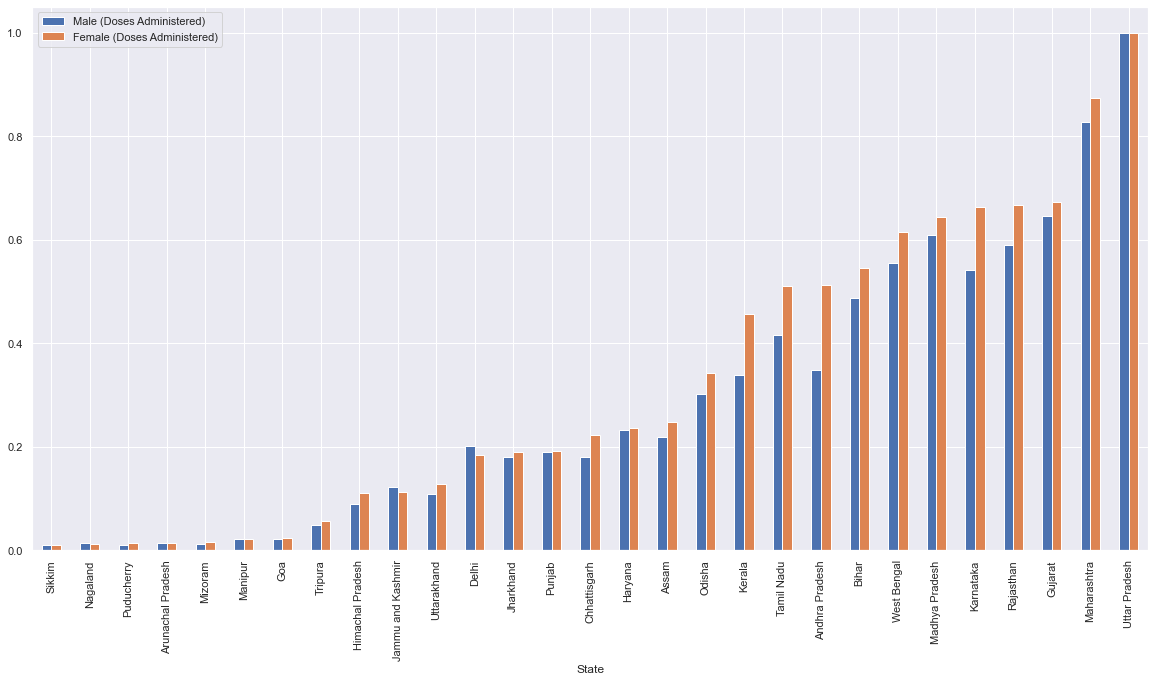

In [68]:
male_vs_female_doses = combined[['Male (Doses Administered)', 'Female (Doses Administered)', 'State']].sort_values('Female (Doses Administered)')
male_vs_female_doses.set_index('State').plot(kind = 'bar', figsize = (20,10), sort_columns = True)

<AxesSubplot:xlabel='State'>

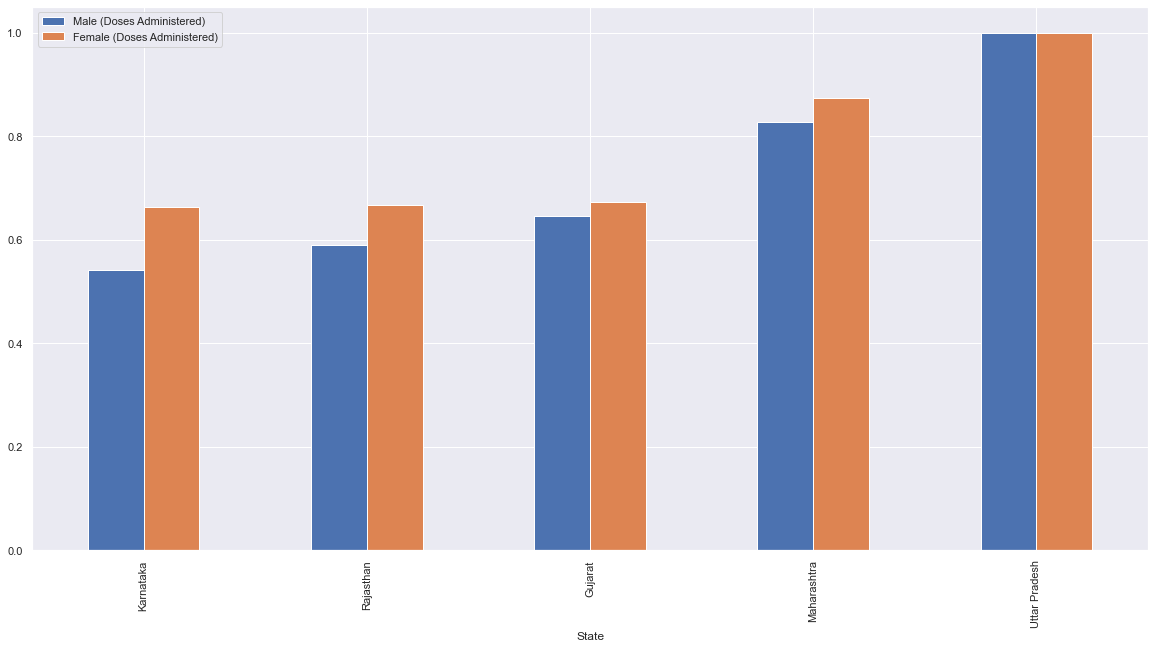

In [69]:
male_vs_female_doses = doses_by_state.tail()[['Male (Doses Administered)', 'Female (Doses Administered)']]
male_vs_female_doses.plot(kind = 'bar', figsize = (20,10), sort_columns = True)

<AxesSubplot:xlabel='State'>

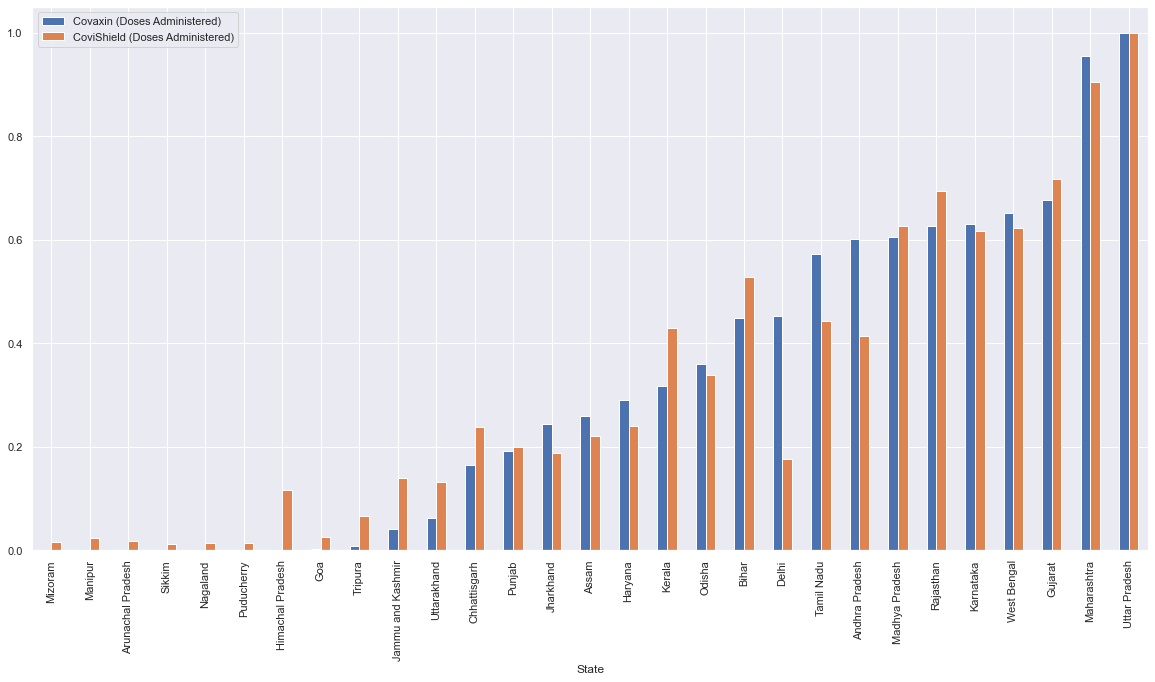

In [70]:
covaxin_vs_covidshield = combined[['Covaxin (Doses Administered)', 'CoviShield (Doses Administered)', 'State']].sort_values(by = 'Covaxin (Doses Administered)')
covaxin_vs_covidshield = covaxin_vs_covidshield.set_index('State')
covaxin_vs_covidshield.plot(kind = 'bar', figsize = (20,10))

C:\Users\yash0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


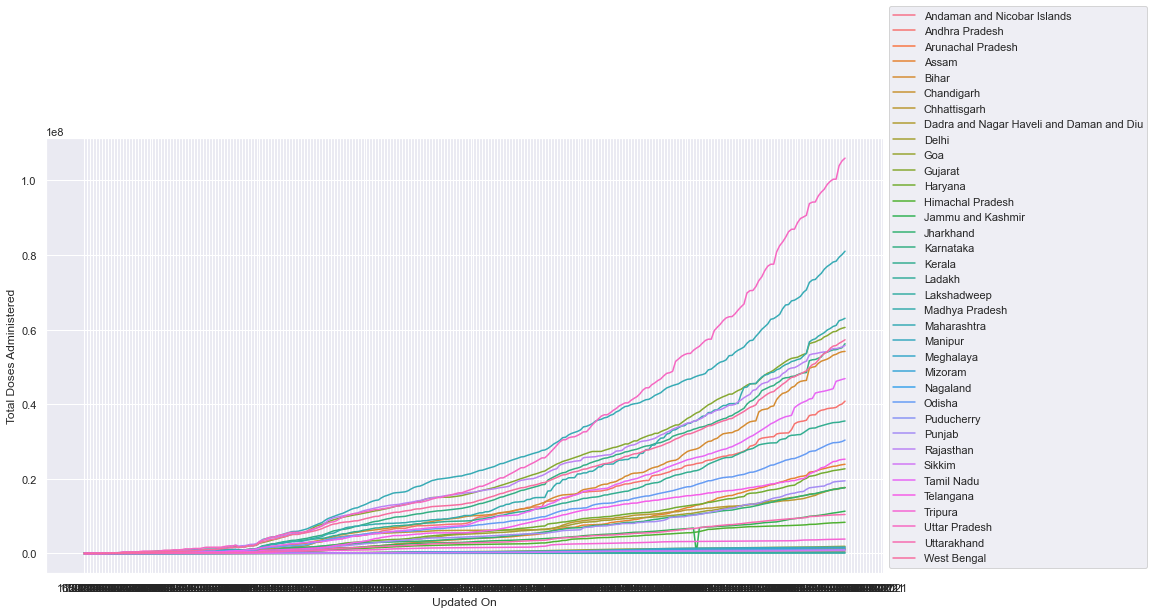

In [71]:
time_wise_plot = df[df['State']=='Goa'][['State', 'Total Doses Administered', 'Updated On']]
time_wise_plot['Updated On'] = time_wise_plot['Updated On'].astype('datetime64')
time_wise_plot
# time_wise_plot = time_wise_plot.set_index(['Updated On'])
# time_wise_plot
# time_wise_plot.plot(kind = 'line', title = 'Plot of {} state for total doses administered'.format(state))

sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.lineplot(df['Updated On'], df['Total Doses Administered'], hue = df['State'])
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)
# plt.figlegend(loc='lower right',bbox_to_anchor=(0.85,0.25))
plt.show()



<AxesSubplot:xlabel='State', ylabel='Total Doses Administered'>

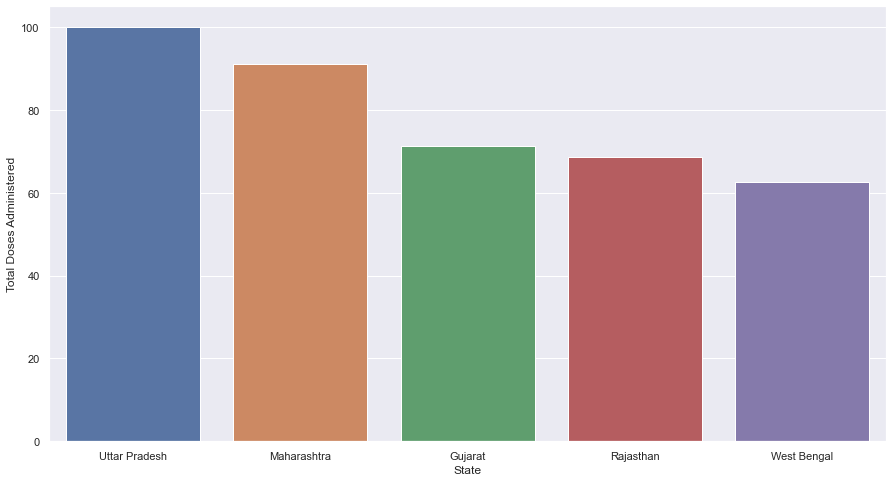

In [72]:
top_5_vaccinated_states = combined.sort_values(by = 'Total Doses Administered', ascending = False).head(5)
top_5_vaccinated_states
sns.barplot(data = top_5_vaccinated_states, x='State', y='Total Doses Administered')

<AxesSubplot:xlabel='Total Doses Administered', ylabel='State'>

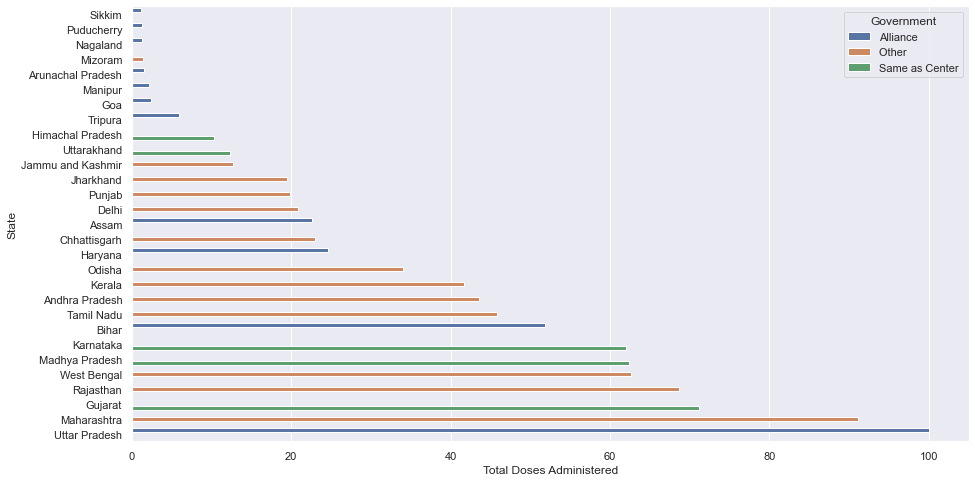

In [85]:
govt_vs_vaccination = combined[['State', 'Total Doses Administered', 'Government']].sort_values('Total Doses Administered')
# govt_vs_vaccination = govt_vs_vaccination.set_index(['State', 'Government'])
sns.barplot(data=govt_vs_vaccination, y='State', x='Total Doses Administered',hue= 'Government')
# sns.scatterplot(data=govt_vs_vaccination, x='State', y='Total Doses Administered',hue= 'Government')
# ax = sns.scatterplot(data=govt_vs_vaccination, x='State', y='Total Doses Administered',hue= 'Government')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

<AxesSubplot:xlabel='State,Government'>

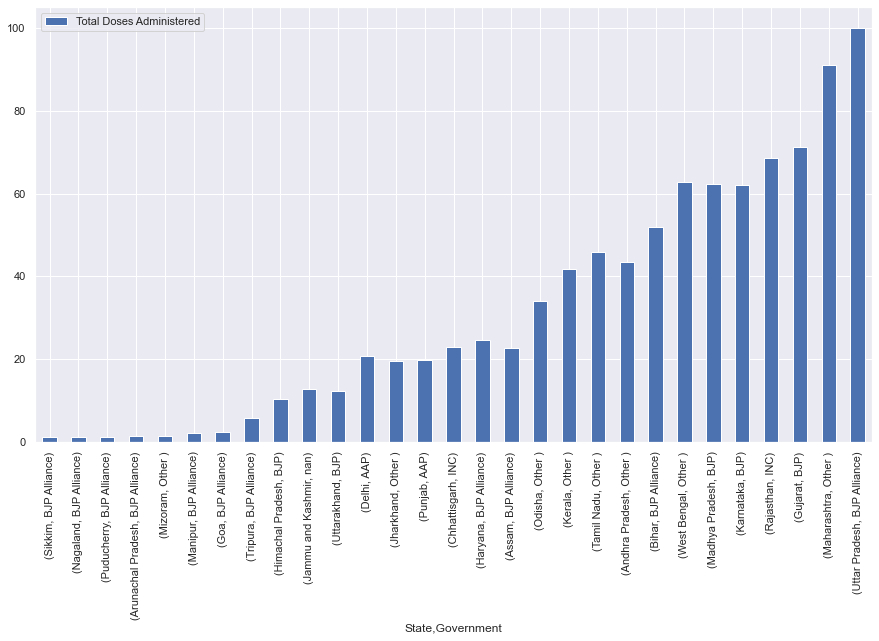

In [49]:
party_vs_state_vaccination = combined[['State', 'Total Doses Administered', 'Government']]
party_vs_state_vaccination = party_vs_state_vaccination.set_index(['State', 'Government'])
party_vs_state_vaccination
# sns.barplot(data=party_vs_state_vaccination, y='State', x='Total Doses Administered',hue= 'Government')
party_vs_state_vaccination.plot(kind='bar')

Enter the state Rajasthan


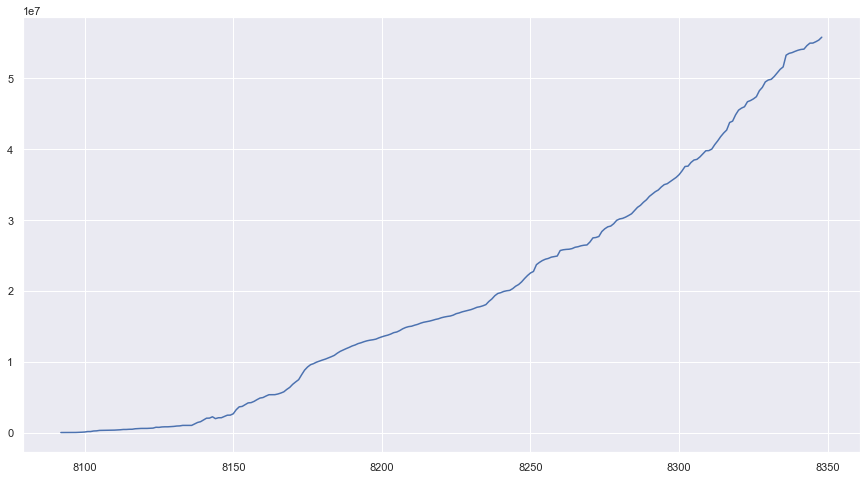

In [111]:
def state_wise_vaccination(state):
    """
    plots a line graph comparing vaccination of the state
    """
    state_doses = df[df['State'] == state]['Total Doses Administered']
    state_doses.plot(kind = 'line')

state = input("Enter the state ")
state_wise_vaccination(state)

References: 
1. https://github.com/91jpark19/2021_Spring_finals/blob/main/Final%20Project%20with%20Doctests.ipynb